# Cost of health insurance solution

## EDA

In [364]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [365]:
import pandas as pd

total_data = pd.read_csv("medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [366]:
total_data.shape

(1338, 7)

### Clean the dataset

In [367]:
total_data.drop_duplicates(inplace=True)
total_data.dropna(inplace=True)

In [368]:
total_data.shape

(1337, 7)

In [369]:
total_data.describe()
total_data.describe(include='object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [370]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


<Axes: >

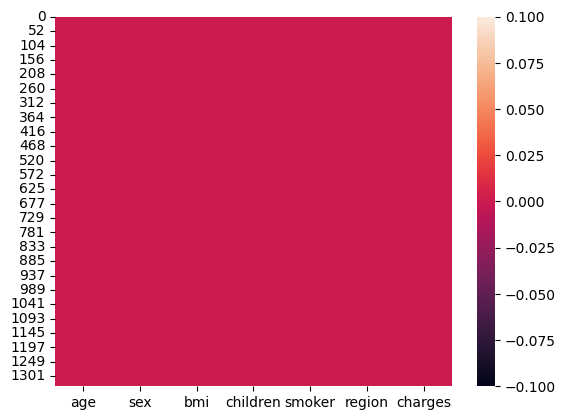

In [371]:
sns.heatmap(total_data.isnull())

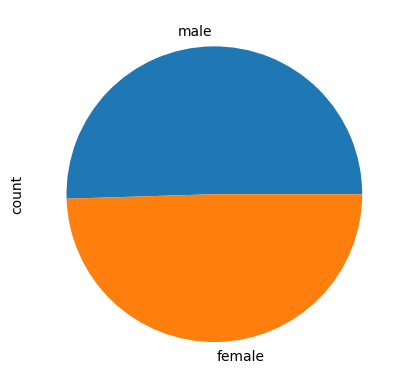

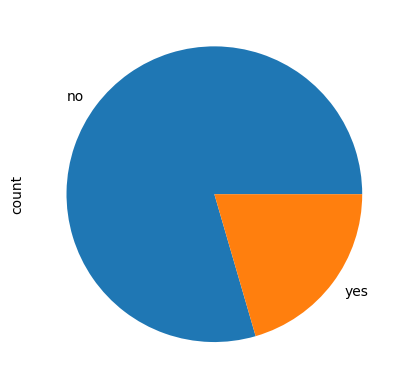

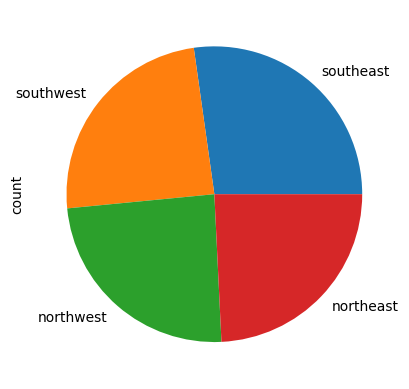

In [372]:
categorical_data = total_data.select_dtypes(exclude=np.number)
categorical_data.head()

#categorical_data_counts = pd.DataFrame([categorical_data.sex.value_counts(), categorical_data.smoker.value_counts(), categorical_data.region.value_counts()], columns=['sex', 'smoker', 'region'])
#categorical_data_counts.head()


categorical_data.sex.value_counts().plot.pie()
plt.show()
categorical_data.smoker.value_counts().plot.pie()
plt.show()
categorical_data.region.value_counts().plot.pie()
plt.show()

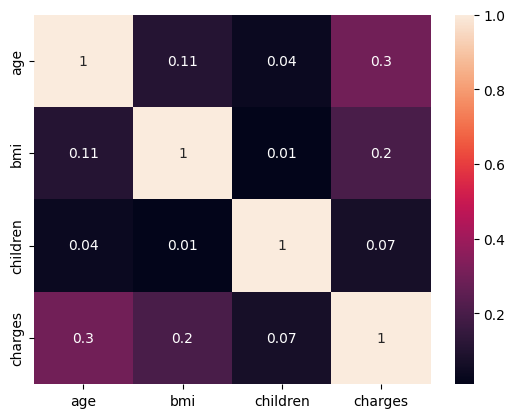

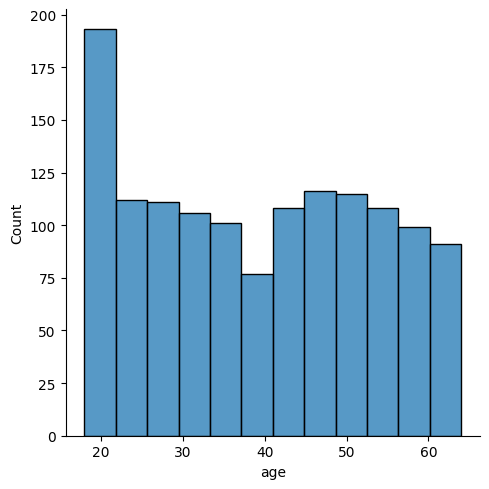

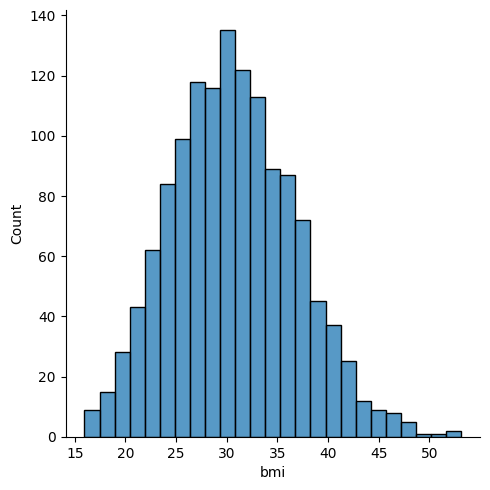

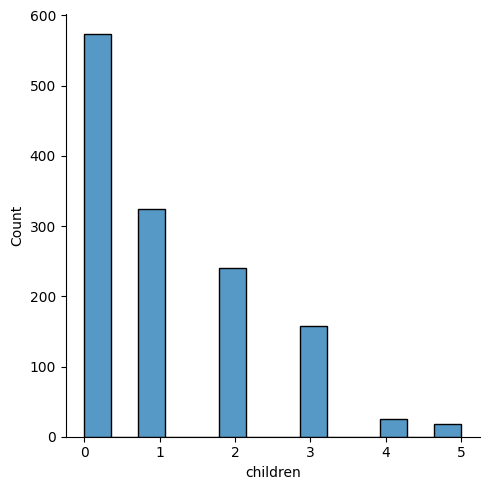

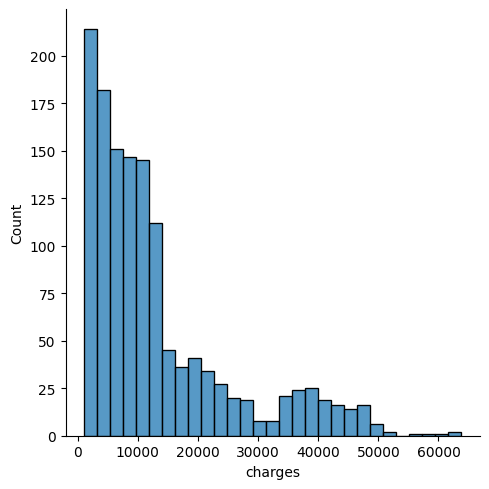

In [373]:
numerical_data = total_data.select_dtypes(include=np.number)
numerical_data.head()

sns.heatmap(np.round(numerical_data.corr(), 2), annot=True)

for c in numerical_data.columns:
    sns.displot(total_data[c])

In [374]:
total_data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: >

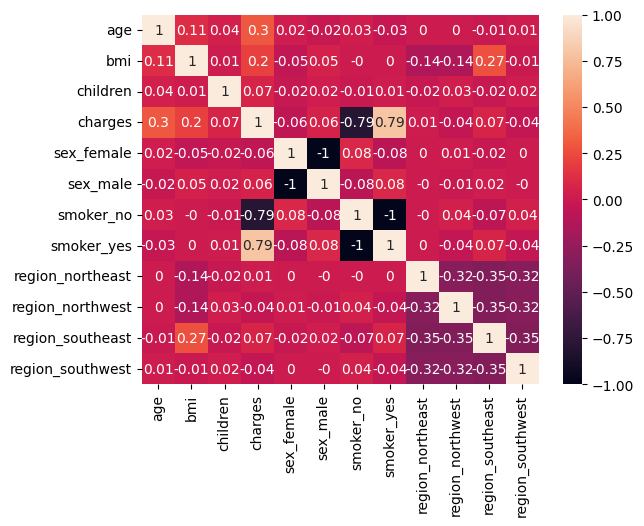

In [375]:
total_data = pd.get_dummies(total_data, columns=['sex', 'smoker', 'region'], dtype=float)
sns.heatmap(np.round(total_data.corr(), 2), annot=True)

In [376]:
numerical_data = total_data.select_dtypes(include=np.number)
numerical_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


### Dataset division 

In [377]:
Y = total_data['charges']
X = total_data.drop('charges')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                   random_state=42,  
                                   test_size=0.25,  
                                   shuffle=True)



KeyError: "['charges'] not found in axis"